# GTC ML Project 1 — Hotel Bookings


In [1]:
# --- Setup & imports ---
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

plt.rcParams['figure.figsize'] = (10,6)

# Detect Colab
try:
    from google.colab import files
    IN_COLAB = True
except Exception:
    IN_COLAB = False
print('IN_COLAB =', IN_COLAB)


IN_COLAB = True


## Upload data

If running in Google Colab, run the next cell and upload `hotel_bookings.csv`. If running locally, ensure `hotel_bookings.csv` is in the working directory.

In [2]:
if IN_COLAB:
    print("Please upload 'hotel_bookings.csv' via the chooser.")
    uploaded = files.upload()
DATA_PATH = 'hotel_bookings.csv'
assert os.path.exists(DATA_PATH), f"{DATA_PATH} not found. Upload it or place it in working dir."
print('DATA_PATH =', DATA_PATH)


Please upload 'hotel_bookings.csv' via the chooser.


Saving hotel_bookings.csv to hotel_bookings.csv
DATA_PATH = hotel_bookings.csv


## Phase 1 — Exploratory Data Analysis & Data Quality
Load data, inspect columns, types, basic stats, and missingness.

In [3]:
df = pd.read_csv(DATA_PATH)
print('Shape:', df.shape)
display(df.head())
print('\nInfo:')
display(df.info())
print('\nNumeric describe:')
display(df.describe().T)


Shape: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal     

None


Numeric describe:


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


,missing_count,missing_pct
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
hotel,0,0.00
is_canceled,0,0.00
stays_in_weekend_nights,0,0.00
arrival_date_day_of_month,0,0.00


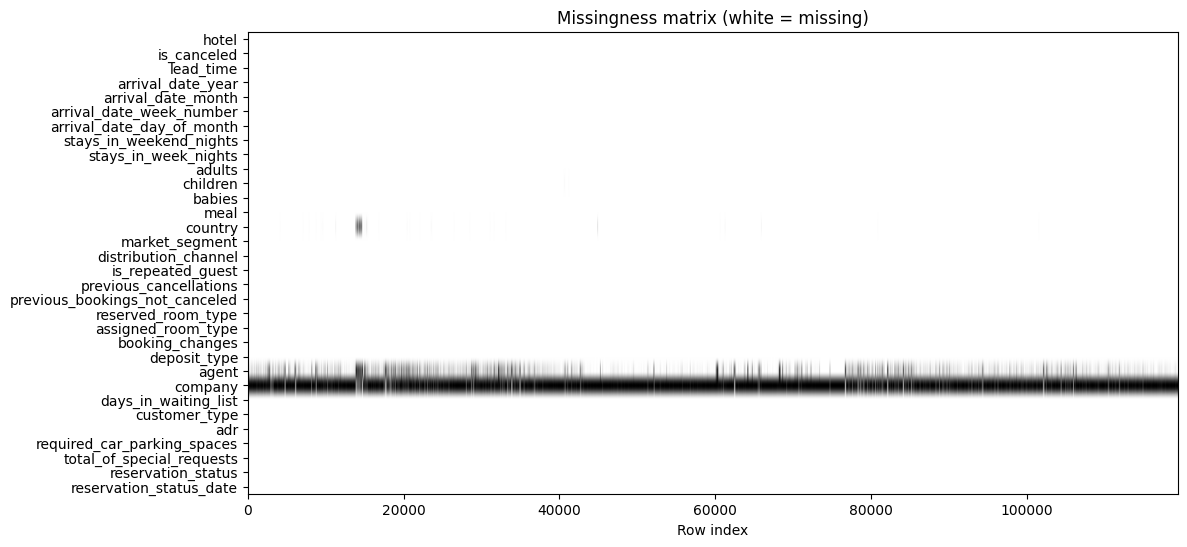

In [4]:
# Missing values summary
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df) * 100).round(2)
missing_table = pd.concat([missing_counts, missing_pct], axis=1)
missing_table.columns = ['missing_count','missing_pct']
display(missing_table)

# Visual missingness matrix
msk = df.isna().astype(int)
plt.figure(figsize=(12,6))
plt.imshow(msk.T, aspect='auto', cmap='gray_r')
plt.yticks(range(len(msk.columns)), msk.columns)
plt.xlabel('Row index')
plt.title('Missingness matrix (white = missing)')
plt.show()


Exact duplicate rows: 31994
Column: adr — n = 119390, lower=-15.77, upper=211.06, outliers=3793


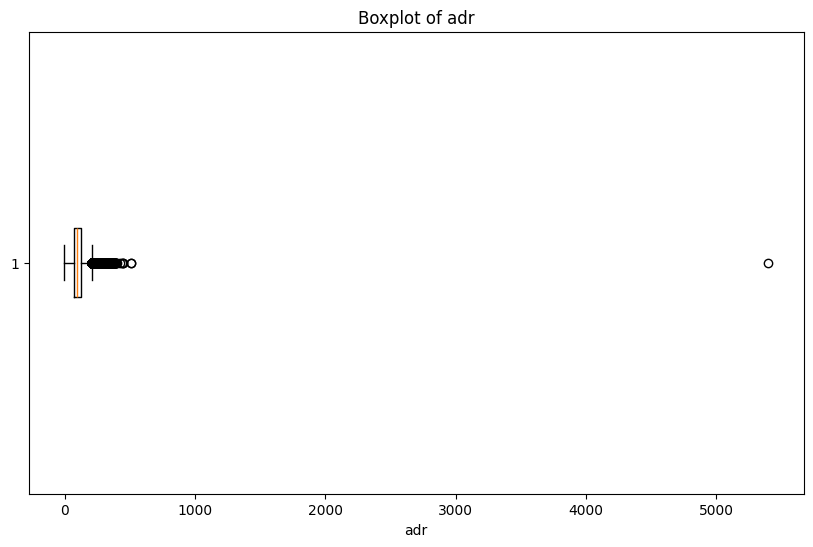

Column: lead_time — n = 119390, lower=-195.00, upper=373.00, outliers=3005


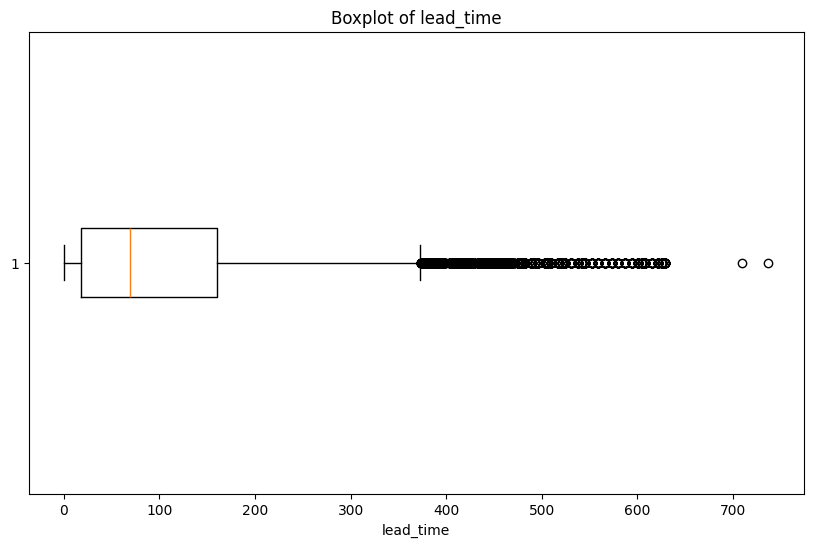

In [5]:
# Duplicate detection & outliers
dup_count = df.duplicated().sum()
print('Exact duplicate rows:', dup_count)

def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

for col in ['adr','lead_time']:
    if col in df.columns:
        s = df[col].dropna()
        lower, upper = iqr_outliers(s)
        n_out = ((s < lower) | (s > upper)).sum()
        print(f"Column: {col} — n = {len(s)}, lower={lower:.2f}, upper={upper:.2f}, outliers={n_out}")
        plt.figure()
        plt.boxplot(s, vert=False)
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()


## Phase 2 — Data cleaning (follow project instructions)
We perform the requested imputations and removals to avoid leakage.

In [6]:
df_clean = df.copy()
# 1) Drop reservation_status & reservation_status_date
for c in ['reservation_status','reservation_status_date']:
    if c in df_clean.columns:
        df_clean.drop(columns=c, inplace=True)
        print('Dropped', c)
# 2) company and agent
if 'company' in df_clean.columns:
    df_clean['company'] = df_clean['company'].fillna('None')
if 'agent' in df_clean.columns:
    df_clean['agent'] = df_clean['agent'].fillna(0)
    try:
        df_clean['agent'] = df_clean['agent'].astype(int)
    except Exception:
        pass
# 3) country: mode
if 'country' in df_clean.columns:
    mode_country = df_clean['country'].mode().iloc[0]
    df_clean['country'] = df_clean['country'].fillna(mode_country)
    print('Imputed country with mode:', mode_country)
# 4) children
if 'children' in df_clean.columns:
    missing_children = df_clean['children'].isna().sum()
    if missing_children>0:
        med_children = int(df_clean['children'].median())
        df_clean['children'] = df_clean['children'].fillna(med_children)
        print('Filled children NA with median:', med_children)
# 5) remove exact duplicates
before = len(df_clean)
df_clean = df_clean.drop_duplicates()
after = len(df_clean)
print('Dropped duplicate rows:', before-after)
# 6) cap adr
if 'adr' in df_clean.columns:
    n_before = (df_clean['adr'] > 1000).sum()
    df_clean.loc[df_clean['adr'] > 1000, 'adr'] = 1000
    print('Capped adr > 1000 — modified:', n_before)
# Remaining missingness
display(df_clean.isna().sum().sort_values(ascending=False))


Dropped reservation_status
Dropped reservation_status_date
Imputed country with mode: PRT
Filled children NA with median: 0
Dropped duplicate rows: 32271
Capped adr > 1000 — modified: 1


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


## Phase 3 — Feature engineering & preprocessing
Create useful derived features and prepare preprocessing pipeline.

In [7]:
df_feat = df_clean.copy()
for col in ['adults','children','babies','stays_in_weekend_nights','stays_in_week_nights']:
    if col not in df_feat.columns:
        df_feat[col] = 0
df_feat['total_guests'] = df_feat['adults'] + df_feat['children'] + df_feat['babies']
df_feat['total_nights'] = df_feat['stays_in_weekend_nights'] + df_feat['stays_in_week_nights']
df_feat['is_family'] = ((df_feat['children']>0) | (df_feat['babies']>0)).astype(int)
display(df_feat[['adults','children','babies','total_guests','total_nights','is_family']].head())


,adults,children,babies,total_guests,total_nights,is_family
0,2,0.0,0,2.0,0,0
1,2,0.0,0,2.0,0,0
2,1,0.0,0,1.0,1,0
3,1,0.0,0,1.0,1,0
4,2,0.0,0,2.0,2,0


In [8]:
# Group rare countries (<1%) into Other and frequency encode
if 'country' in df_feat.columns:
    freq = df_feat['country'].value_counts(normalize=True)
    rare_thresh = 0.01
    rare_countries = freq[freq < rare_thresh].index.tolist()
    df_feat['country_grouped'] = df_feat['country'].map(lambda x: 'Other' if x in rare_countries else x)
    country_freq = df_feat['country_grouped'].value_counts(normalize=True).to_dict()
    df_feat['country_freq_enc'] = df_feat['country_grouped'].map(lambda x: country_freq.get(x,0))
    display(df_feat[['country','country_grouped','country_freq_enc']].head())
else:
    print('Column country not found')


,country,country_grouped,country_freq_enc
0,PRT,PRT,0.318231
1,PRT,PRT,0.318231
2,GBR,GBR,0.119538
3,GBR,GBR,0.119538
4,GBR,GBR,0.119538


In [9]:
# Select low-cardinality columns for One-Hot Encoding
low_card = [c for c in ['meal','market_segment','distribution_channel','deposit_type','reserved_room_type'] if c in df_feat.columns]
print('Low-cardinality to OHE:', low_card)


Low-cardinality to OHE: ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'reserved_room_type']


In [12]:
# Prepare final dataset: drop identifiers/leakage
df_final = df_feat.copy()
drop_cols = ['name','reservation_status','reservation_status_date','country','country_grouped']
for c in drop_cols:
    if c in df_final.columns:
        df_final.drop(columns=c, inplace=True)
print('Columns after drop:', df_final.shape)
target = 'is_canceled' if 'is_canceled' in df_final.columns else None
if target is None:
    raise ValueError('Target is_canceled not found — check dataset')
X = df_final.drop(columns=[target])
y = df_final[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Columns after drop: (87119, 33)
Train shape: (69695, 32) Test shape: (17424, 32)


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Numeric pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Use correct param depending on sklearn version
try:
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # new param
    ])
except TypeError:
    # fallback if running on older scikit-learn
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, low_card)
], remainder='passthrough')

# Fit & save
preprocessor.fit(X_train)
with open('preprocessor.pkl','wb') as f:
    pickle.dump(preprocessor, f)
print("Saved preprocessor.pkl")


Saved preprocessor.pkl


In [15]:
# Transform and save cleaned train/test
X_train_trans = preprocessor.transform(X_train)
X_test_trans = preprocessor.transform(X_test)

def get_feature_names(preprocessor, X):
    num_cols = preprocessor.transformers_[0][2]
    cat_cols = preprocessor.transformers_[1][2]
    ohe = preprocessor.transformers_[1][1].named_steps['ohe']
    cat_names = ohe.get_feature_names_out(cat_cols).tolist() if hasattr(ohe,'get_feature_names_out') else []
    remainder_cols = [c for c in X.columns if c not in num_cols + cat_cols]
    return list(num_cols) + cat_names + remainder_cols

feature_names = get_feature_names(preprocessor, X_train)
X_train_df = pd.DataFrame(X_train_trans, columns=feature_names)
X_test_df = pd.DataFrame(X_test_trans, columns=feature_names)
train_out = pd.concat([X_train_df.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_out  = pd.concat([X_test_df.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
train_out.to_csv('hotel_bookings_train_clean.csv', index=False)
test_out.to_csv('hotel_bookings_test_clean.csv', index=False)
print('Saved cleaned CSVs')


Saved cleaned CSVs


In [17]:
# Final sanity check and instructions
print('Train cleaned shape:', train_out.shape)
print('Test cleaned shape:', test_out.shape)
print('\nFiles generated:')
for f in ['hotel_bookings_train_clean.csv','hotel_bookings_test_clean.csv','preprocessor.pkl']:
    print(f, '->', os.path.exists(f))



Train cleaned shape: (69695, 59)
Test cleaned shape: (17424, 59)

Files generated:
hotel_bookings_train_clean.csv -> True
hotel_bookings_test_clean.csv -> True
preprocessor.pkl -> True
